In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
%matplotlib nbagg

In [81]:
#r = [x1, y1, z1, vx1, vx2, vx3, x2, y2, z2, vx2, vy2, vz2,...] 
def n_body_diff_ec2(t, r, ms, G=1):
    #Number of bodies. For each body there must be 6 ecuations,
    #3 for the position (x, y, z) and 3 for the velocity (vx, vy, vz).
    n = 6
    N = int(len(r)/n)
    
    ecs = np.zeros(len(r))
    
    for i in range(N):
        dvdt_i = [0, 0, 0]
        
        for j in range(N):
            if i != j:
                d = np.sqrt((r[6*j+0]-r[6*i+0])**2 +
                            (r[6*j+1]-r[6*i+1])**2 +
                            (r[6*j+2]-r[6*i+2])**2 )
        
                for k in range(3):
                    dvdt_i[k] += G*ms[j]*( r[6*j+k] - r[6*i+k] ) / d**3
                 
        for l in range(3):
            ecs[6*i + l] = r[6*i + 3 + l]
            ecs[6*i + 3 + l] = dvdt_i[l] 
            
    return ecs

In [82]:
#Canonical units
m  = 1
km = 1000*m
kg = 1
s  = 1
G  = 6.67408e-11*m**3/kg/s**2

ul = 1.496e11*m
um = 1.9891e30*kg
ut = np.sqrt(ul**3/(G*um))
G  = 1

In [83]:
ts = np.linspace(0,10,1000)

#2460137.500000000, A.D. 2023-Jul-12 00:00:00.0000
r0_earth = np.array([4.848699560241013e07, -1.439397562999847e08,  3.931407977953553e04])*km/ul
v0_earth = np.array([2.767608177941993e+01,  9.614571634814915e00, -1.718473867297732e-03])*ut*km/ul

r0_sun = np.array([-1.296017248118172e06, -2.337495044428839e05,  3.212375063867877e04])*km/ul
v0_sun = np.array([5.241266085107748e-03, -1.431905791075515e-02,  1.150594182148038e-06])*ut*km/ul

ev = np.concatenate((r0_sun, v0_sun, r0_earth, v0_earth))
ms = [1, 5.9722e24/um]

In [84]:
sol = odeint(n_body_diff_ec2, y0=ev, t=ts, args=(ms,), tfirst=True )

<IPython.core.display.Javascript object>


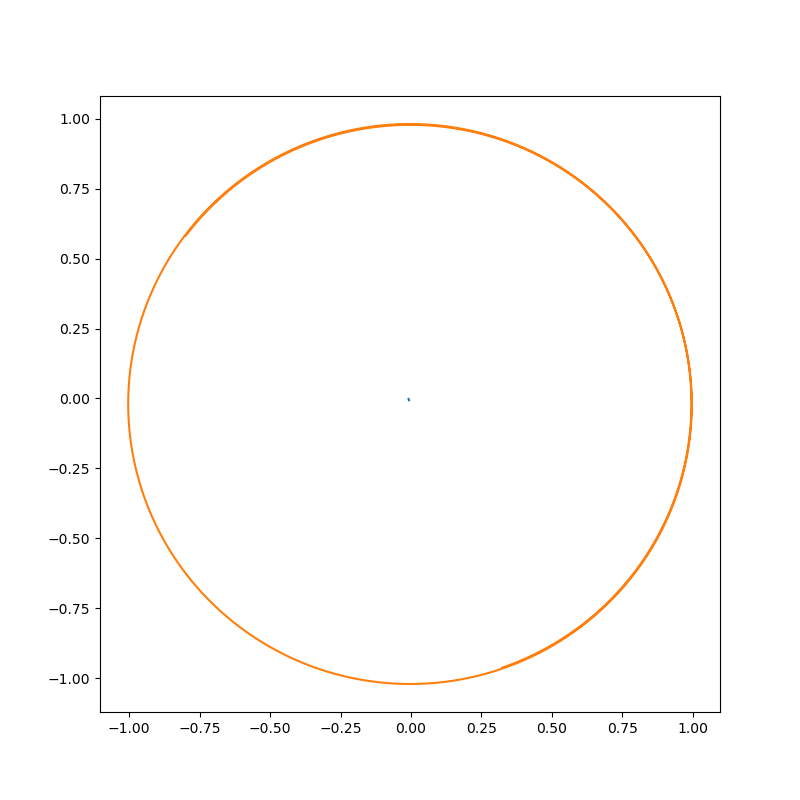

In [85]:
fig = plt.figure(figsize=(8,8))
plt.plot(sol.T[0], sol.T[1])
plt.plot(sol.T[6], sol.T[7])